In [1]:

from zipfile import ZipFile
import os
# The data directory is currently hard-coded, if you want to train in different location you need to change it: 
#C:\Users\name\AppData\Roaming\Ultralytics\settings.yaml
# then you need to re-import it 
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
import torch
import numpy as np
from PIL import Image  # to display images
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

print(f"Setup complete. Using torch {torch.__version__} on device ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Ultralytics YOLOv8.0.207  Python-3.11.4 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Setup complete  (24 CPUs, 63.8 GB RAM, 406.1/930.7 GB disk)


Setup complete. Using torch 2.0.1 on device (NVIDIA GeForce RTX 3090)


# Load a model
The data directory is currently hard-coded, if you want to train in different location you need to change it: 
#C:\Users\name\AppData\Roaming\Ultralytics\settings.yaml
then you need to re-import it 

In [2]:
model_pose = YOLO('yolov8n-pose.pt')  # load a pretrained YOLOv8n classification model

# Let's see how can we train the model

In [3]:
model_pose.train(data='coco8-pose.yaml', epochs=10)  # train the model

Ultralytics YOLOv8.0.207  Python-3.11.4 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=coco8-pose.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti


      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size
       7/10     0.755G        1.1      1.342     0.3191     0.8752      1.353          7        640: 100%|██████████| 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP
                   all          4         14      0.919      0.929      0.948      0.694      0.969      0.643      0.652      0.313

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size
       8/10     0.755G     0.9448      2.111     0.3352     0.7902      1.153          7        640: 100%|██████████| 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP
                   all          4         14      0.928      0.925      0.957      0.712      0.961      0.643      0.652      0.309

      Epoch    GPU_mem   box_loss  pose_loss  kobj_

ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000014EAEAA6550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,

# Use the model

In [4]:
results_pose=model_pose('https://ultralytics.com/images/bus.jpg')  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\kovac\Desktop\DND_Labor\Labor 10\bus.jpg: 640x480 4 persons, 31.0ms
Speed: 2.0ms preprocess, 31.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)


### Let's see what the "results" contain

In [5]:
results_pose

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 orig_img: array([[[122, 148, 172],
         [120, 146, 170],
         [125, 153, 177],
         ...,
         [157, 170, 184],
         [158, 171, 185],
         [158, 171, 185]],
 
        [[127, 153, 177],
         [124, 150, 174],
         [127, 155, 179],
         ...,
         [158, 171, 185],
         [159, 172, 186],
         [159, 172, 186]],
 
        [[128, 154, 178],
         [126, 152, 176],
         [126, 154, 178],
         ...,
         [158, 171, 185],
         [158, 171, 185],
         [158, 171, 185]],
 
        ...,
 
        [[185, 185, 191],
         [182, 182, 188],
         [179, 179, 185],
         ...,
         [114, 107, 112],
         [115, 105, 111],
         [116, 106, 112]],
 
        [[157, 157, 163],
         [180, 180, 186],
         [185, 186, 190],
    

In [6]:
results_pose[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9857, 0.9099, 0.9742, 0.4445, 0.8884, 0.9915, 0.9958, 0.9596, 0.9879, 0.9346, 0.9762, 0.9975, 0.9984, 0.9946, 0.9968, 0.9728, 0.9808],
        [0.3012, 0.3525, 0.0814, 0.4883, 0.0681, 0.7641, 0.3864, 0.7177, 0.1681, 0.6093, 0.1972, 0.7633, 0.5698, 0.8197, 0.6456, 0.6810, 0.5436],
        [0.9801, 0.9174, 0.9610, 0.6155, 0.8602, 0.9919, 0.9959, 0.9559, 0.9801, 0.9317, 0.9623, 0.9968, 0.9976, 0.9939, 0.9957, 0.9757, 0.9806],
        [0.1362, 0.0938, 0.0586, 0.1207, 0.0688, 0.4885, 0.1803, 0.5293, 0.1430, 0.5345, 0.2075, 0.3869, 0.2263, 0.3617, 0.2063, 0.2495, 0.1635]], device='cuda:0')
data: tensor([[[1.4395e+02, 4.4614e+02, 9.8568e-01],
         [1.4909e+02, 4.3789e+02, 9.0992e-01],
         [1.3382e+02, 4.3772e+02, 9.7416e-01],
         [0.0000e+00, 0.0000e+00, 4.4451e-01],
         [1.0718e+02, 4.4241e+02, 8.8844e-01],
         [1.6321e+02, 4.9571e+02, 9.9147e-01],
         [8.9853e+01, 4.9864e+02, 9.9578e-

In [7]:
print(results_pose[0].keypoints.xy.shape)

torch.Size([4, 17, 2])


## Let's display the results

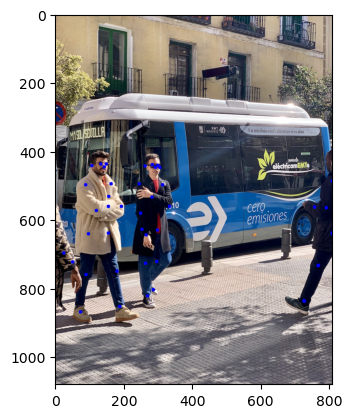

In [8]:
Instance=results_pose[0].keypoints.xy.shape[0]
Keypoints=results_pose[0].keypoints.xy.shape[1]
img_pose = cv2.imread("bus.jpg")
img_pose = cv2.cvtColor(img_pose, cv2.COLOR_BGR2RGB)

for i1 in range(Instance):
    for k1 in range(Keypoints):
        x=int(results_pose[0].keypoints.xy[i1,k1,0].detach().cpu().item())
        y=int(results_pose[0].keypoints.xy[i1,k1,1].detach().cpu().item())
        img_pose = cv2.circle(img_pose, (x,y), radius=5, color=(0, 0, 255), thickness=-1)

img_pose = Image.fromarray(img_pose)  # RGB PIL image
plt.imshow(img_pose)
img_pose.show()  # show image